In [1]:
%info

In [2]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1588538264359_0003,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

In [3]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [4]:
df = spark.read.json('s3://sta9760-laura-spark-datasets/yelp-dataset/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
print(f'Total Columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count():,}')
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable

In [41]:
df.select('business_id','name','city','state','stars','categories','is_open').show(5, truncate=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+-----+--------------------+-------+
|         business_id|                name|           city|state|stars|          categories|is_open|
+--------------------+--------------------+---------------+-----+-----+--------------------+-------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|  3.5|Active Life, Gun/...|      1|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|  5.0|Health & Medical,...|      1|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|  5.0|Pets, Pet Service...|      1|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|  2.5|Hardware Stores, ...|      0|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|  4.5|Home Services, Pl...|      1|
+--------------------+--------------------+---------------+-----+-----+--------------------+-------+
only showing top 5 rows

## How many unique categories are represented in this dataset?

In [13]:
from pyspark.sql.functions import split, explode

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
df1 = df.withColumn('categories',explode(split('categories',',')))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
#df1 = df1.filter(df1.is_open==1)
df1.select('business_id','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       categories|
+--------------------+-----------------+
|f9NumwFMBDn751xgF...|      Active Life|
|f9NumwFMBDn751xgF...| Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|      Guns & Ammo|
|f9NumwFMBDn751xgF...|         Shopping|
|Yzvjg0SayhoZgCljU...| Health & Medical|
+--------------------+-----------------+
only showing top 5 rows

In [51]:
df1.select('categories').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2505

In [52]:

from pyspark.sql.functions import upper, col


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
df1.select(upper(col('categories'))).distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2505

## Top Categories By Business

In [47]:
df2=df1.groupby('categories').count()
df2.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|    Furniture Stores| 1426|
|      Dermatologists|   63|
|              Korean|  457|
| Boudoir Photography|   59|
|    Hot Air Balloons|    5|
| Beach Equipment ...|    7|
|    Historical Tours|    8|
|      Paddleboarding|    7|
| Mobile Home Dealers|    3|
|               Tires| 1821|
|  Car Window Tinting|  232|
|       Skating Rinks|   36|
|              Fondue|   12|
|       Data Recovery|   28|
|   Pet Waste Removal|    5|
|    Historical Tours|   42|
| Commercial Truck...|   88|
|       Videographers|   31|
|               Hakka|   39|
|       Live/Raw Food|   43|
+--------------------+-----+
only showing top 20 rows

In [48]:
df2.orderBy("count", ascending=False).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|30776|
|            Shopping|21555|
|                Food|18475|
|       Home Services|14886|
|         Restaurants|13189|
|    Health & Medical|12758|
|       Beauty & Spas|11951|
|      Local Services|10884|
|          Automotive| 8984|
|           Nightlife| 7932|
| Event Planning &...| 7501|
|                Bars| 7117|
|            Shopping| 6925|
|         Active Life| 6521|
|                Food| 6369|
|       Home Services| 5767|
|       Beauty & Spas| 5342|
|           Fast Food| 5300|
|       Home & Garden| 5272|
|             Fashion| 5192|
+--------------------+-----+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

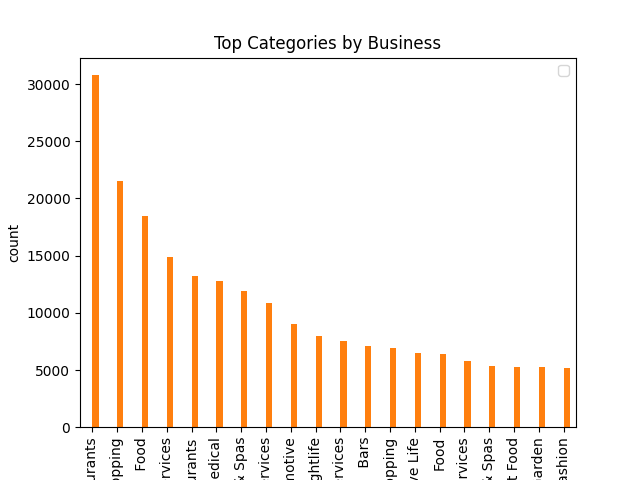

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
#result_pdf = df2.orderBy("count", ascending=False).limit(20).toPandas().reset_index().set_index(['categories'])
result_pdf = df2.orderBy("count", ascending=False).limit(20).toPandas()


#chart = result_pdf.plot(kind='bar')
plt.title('Top Categories by Business')
plt.xlabel('category')
plt.ylabel('count')
plt.legend('')
plt.yticks(result['count'])
%matplot plt